# PRABAL GHOSH

# LAB - NAIVE BAYES

# The naive Bayes classifier

## Introduction

A supervised classification method, with a lot of assumptions ..., but well adapted to high dimensional data with moderate sample size. 

As reminder:
- logistic regression puts a model on $P(y|x)$ and estimates the parameters by minimizing the cross-entropy loss
- SVM puts a model only on the classification boundary and research the separating hyperplane with largest margin 

Another philosophy is to consider a generative model on data distribution, i.e. model $P(x,y)$ by writting $P(x,y) = P(y)P(x|y)$. Thus it is only needed to estimate $P(x|y)$ for each possible value of $y$ (multivariate gaussian distribution, multivariate multinomial distribution, ...), and also $P(y)$ the prior probabilities (typically simply the proportion of each class). Then the posterior probability $P(y|x)$ can be computed by using the **Bayes theorem**: 

$$
P(y|x) = \frac{P(y)P(x|y)}{P(x)} = \frac{P(y)P(x|y)}{\sum_{k=1}^{K} P(y=k) P(x|y=k)}
$$


## The model

Let assume that $x \in \mathcal{X}$ : 
- **Continuous features**: $\mathcal{X}=\mathcal{R}^d$, $P(x|y=k)$ is modeled by a multivariate density.
- **Categorical features**: $\mathcal{X}=\prod_{j=1}^{d}\{1, ..., m_j\}$, $P(x|y=k)$ is modeled by a multivariate probability.
- Also possible **mixed data**: both continuous and categorical

**Question**: What model use for $P(x|y=k)$?

**Some ideas**:
- Multivariate normal distribution (need only to estimate the vector of expectations and the variance covariance matrix) 
- Mixture of multivariate normal distribution for more flexibility
- Not so many models for categorical data ... 

**The Naives assumtion**:
$$
P(x|y=k) = P(x_1, \ldots, x_d |y=k) = \prod_{j=1}^{d} P(x_j|y=k),
$$ 

It assumes that all the variables are independant given the class. 

- Avoid to model dependency! 
- Only need to model $P(x_j|y=k)$ by a univariate distribution
    - univariate discrete probability distribution for categorical variables (multinomial, Poisson, ...) 
    - univariate probability density function (normal, Student, Gamma, exponential, ...)


Let assume that $P(x_j|y=k)$ belong to some parametric family we will denote  $P(x_j|y=k) := P(x_j|\theta_{kj})$  where $\theta_{kj}$ are the paramters of the distribution of variable $j$ in class $k$:
- $\theta_{kj} = (\mu_{kj} , \sigma_{kj}^2)$ for a Gaussian distribution
- $\theta_{kj} = (\alpha_{kj1}, ..., \alpha_{kjm_{j}})$ for a multinomial distribution where $\alpha_{kjh}$ is the probability of the model $h$ of variable $j$ in class $k$


## Parameters estimation

Parameters are estimated by maximum likelihood as in statistical inference!

Let $\theta_k = (\theta_{k1}, ..., \theta_{kd})$ that groups all the parameter of class $k$, let also denote by $\pi_k = P(y=k)$ the prior probability of class which also need to be estimated. 

Let denote by $\theta = (\pi_1, ..., \pi_K, \theta_1, \ldots, \theta_K)$ that groups all the paramters of the model 

The likelihood is: 
$$
\ell(\theta) = \sum_{k=1}^{K} \sum_{i \in \mathcal{C}_k} \log (\pi_k P(x_i | \theta_k))
$$
with $\mathcal{C}_k$ the set of data points belonging to class $k$


**Estimation of the prior probabilities**

For all $k \in \{1, ..., K \}$
$$
\hat \pi_k = \frac{n_k}{n}
$$
with $n_k$ the number of data in class $k$, among the total of $n$ data. 

*Remark*: This can depend on the sampling scheme, for instance in the medical setting we can consider restrospective sampling, i.e. fix by advance the proportion of each class in the training data, for instance for rare diseases have the same number of patient with and without the disease in the cohort. In this case the user can give manually the proportion of each class in the whole population.  


**Gaussian distribution**
For $k \in \{1, ..., K\}$, $j \in \{1,...,d\}$
$$
\hat\mu_{kj} = \frac{\sum_{i \in \mathcal{C}_k} x_{ij}}{n_k}
$$

$$
\hat\sigma_{kj}^2 = \frac{\sum_{i \in \mathcal{C}_k} (x_{ij}-\hat\mu_{kj})^2}{n_k}
$$


**Multinomial distribution**
For $k \in \{1, ..., K\}$, $j \in \{1,...,d\}$ and $h \in \{1,...,m_j\}$
$$
\hat\alpha_{kjh} = \frac{n_{kjh}}{n_k}
$$
with $n_{kjh}$ the number of times that modality $h$ of variable $j$ has been observed in class $k$.

*Remark*: Regularized version of the estimators can be consider to avoid to estimate some $\hat\alpha_{kjh}$ to $0$. For instance $\hat\alpha_{kjh} = \frac{n_{kjh} + c}{n_k + c m_j}$ where $c>0$ is some regularization parameter.


## Prediction of the class for new data

Based on $\hat\theta$, it is possible to compute $\forall k \in \{1, ..., K\}$:
$$
P(y=k|x, \hat\theta) = \frac{\hat\pi_k P(x|\hat\theta_k)}{\sum_{k=1}^{K} \hat\pi_k P(x|\hat\theta_k)}
$$

Then the predicted class can be obtained by Maximum A Posteriori (MAP)

$$
\hat y = \arg\max_{k \in \{1, ..., K \}} P(y=k|x, \hat\theta)
$$

 
## Discussion 

The model make stong assumptions, i.e. models the distribution of $(x,y)$, where only the distribution of $y|x$ or even only the decision boundary is needed to make prediction. 

Thus this leds to model miss-specification which may degrade the performance of the final classifier. However such kind of model can still work well with moderate sample size and high number of variables. See for instance [1]

[1] Hand, D. J., & Yu, K. (2001). Idiot's Bayes—not so stupid after all?. International statistical review, 69(3), 385-398.





# 1. Naive Bayes in sklearn

More information can be found on :

https://scikit-learn.org/stable/modules/naive_bayes.html

The main functions are :
- `GaussianNB` : Naive Bayes for continuous features using Gaussian assumption
- `BernoulliNB` : Naive Bayes classifier for multivariate Bernoulli models.
- `CategoricalNB` : Naive Bayes classifier for categorical features.
- `MultinomialNB` : Naive Bayes classifier for multinomial models.
- `ComplementNB` : Complement Naive Bayes classifier.

For mixed-type of features there is not dedicated function in sklearn, but continous features can for instances be discretized in order to use `ComplementNB` on the discretized dataset.

**Q1** : By looking at the documentation explain the differences between `BernoulliNB`, `CategoricalNB` and `MultinomialNB`

- **BernoulliNB** =  BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

- **CategoricalNB** = The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.



- **MultinomialNB**  =  The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. 

## Continuous features

In [7]:
%matplotlib inline
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [8]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Q2**: Apply the `GaussianNB` to train the model on the iris dataset

In [9]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [10]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


- **class_prior_** attribute represents the prior probability of each class. These are the probabilities assumed for the classes in the absence of any input features

In [11]:
print("mean",classifier.class_prior_)

mean [0.38666667 0.26666667 0.34666667]


**here  classes so we got  different prior probability  for classes**

In [12]:
print("mean",classifier.theta_)

mean [[-0.9613413   0.63460144 -1.16137032 -1.13224244]
 [ 0.08628871 -0.91698259  0.2730818   0.16009988]
 [ 1.00588937 -0.00245347  1.08531167  1.13973204]]


- **theta_** attribute represents the empirical log probability of features given a class, estimated from the training data. Each row corresponds to a class, and each column corresponds to a feature.
- This will print the mean of theta_ values for each feature and each class in your trained Naive Bayes classifier.

In [13]:
classifier.var_

array([[0.12313385, 0.75580348, 0.00447543, 0.01245427],
       [0.30574543, 0.47437691, 0.07013235, 0.06766935],
       [0.46373116, 0.58069278, 0.08600022, 0.07007181]])

- **var_** attribute represents the variance of each feature per class. This attribute is typically used for the calculation of the smoothing parameter in the Naive Bayes model.
-  This will print the variances of each feature for each class in your trained Naive Bayes classifier.

<Axes: >

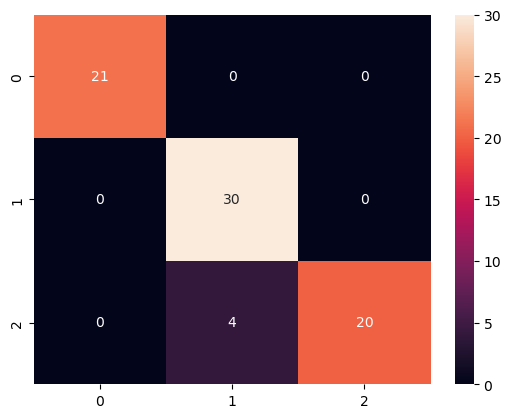

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [15]:
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9466666666666667


**Q3**: Let consider the following functions
- `predict_joint_log_proba(X)`
- `predict_log_proba(X)`
- `predict_proba(X)`

(a) Explain what the above functions do and illustrate it on the iris dataset

(b) Explain the use of making use of the log instead of directly computing the probability

In [23]:
#  log is used for stabiliy of the equation 
#  log of pdf of gaussian is simple to calculate  

- **predict_joint_log_proba(X)** 

n*c array 

- **predict_log_proba(X)**


- **predict_proba(X)**



In [17]:
X_test.shape

(75, 4)

In [18]:
classifier.predict_joint_log_proba(X_test).shape

(75, 3)

In [20]:
classifier.predict_joint_log_proba(X_test)[1:10]

array([[-2.43167720e+02, -3.97918268e+00, -2.39083534e+01],
       [-2.69379888e+00, -4.34603727e+01, -7.78785652e+01],
       [-8.92749339e+02, -1.66887959e+01, -3.56188002e+00],
       [ 1.29705871e+00, -3.32067369e+01, -7.28949619e+01],
       [-9.46084853e+02, -2.58208089e+01, -3.75647926e+00],
       [ 4.51887240e-01, -3.39987306e+01, -7.21168744e+01],
       [-4.32323735e+02, -4.37031838e+00, -7.11740700e+00],
       [-4.40881603e+02, -3.71506284e+00, -8.59738466e+00],
       [-2.72749724e+02, -1.52589200e+00, -1.41876209e+01]])

In [21]:
classifier.predict_log_proba(X_test)[1:10]

array([[-2.39188537e+02, -2.21243779e-09, -1.99291707e+01],
       [ 0.00000000e+00, -4.07665738e+01, -7.51847663e+01],
       [-8.89187461e+02, -1.31269179e+01, -1.99091363e-06],
       [-1.11022302e-15, -3.45037956e+01, -7.41920206e+01],
       [-9.42328374e+02, -2.20643297e+01, -2.61567212e-10],
       [-1.11022302e-15, -3.44506178e+01, -7.25687616e+01],
       [-4.28015560e+02, -6.21427637e-02, -2.80923138e+00],
       [-4.37174091e+02, -7.55081626e-03, -4.88987264e+00],
       [-2.71223835e+02, -3.17015366e-06, -1.26617321e+01]])

In [22]:
classifier.predict_proba(X_test)[1:10]

array([[1.32354372e-104, 9.99999998e-001, 2.21243804e-009],
       [1.00000000e+000, 1.97379457e-018, 2.22674692e-033],
       [0.00000000e+000, 1.99091165e-006, 9.99998009e-001],
       [1.00000000e+000, 1.03559983e-015, 6.00917501e-033],
       [0.00000000e+000, 2.61567260e-010, 1.00000000e+000],
       [1.00000000e+000, 1.09216133e-015, 3.04640240e-032],
       [1.30377984e-186, 9.39748715e-001, 6.02512848e-002],
       [1.37310821e-190, 9.92477620e-001, 7.52238046e-003],
       [1.61802403e-118, 9.99996830e-001, 3.17014863e-006]])


In scikit-learn, these methods are often associated with classifiers for making predictions. Here's what each of these methods does:

- **predict_joint_log_proba(X):** This method computes the logarithm of the joint probability density function for the samples in X. The joint probability density function is the probability that a sample belongs to each class, taking into account the correlation between classes.

- **predict_log_proba(X):** This method computes the logarithm of the probability estimates for each class for all samples in X. It returns an array where each row corresponds to a sample, and each column corresponds to a class, containing the logarithm of the probability of each class for each sample.

- **predict_proba(X):** This method computes the probability estimates for each class for all samples in X. It returns an array where each row corresponds to a sample, and each column corresponds to a class, containing the probability of each class for each sample.

**predict_joint_log_proba(X_test):**

This method computes the logarithm of the joint probability density function for the samples in `X_test`.
The joint probability density function represents the probability that a sample belongs to each class, taking into account the correlation between classes.
`joint_log_proba` will be a 2D array where each row corresponds to a sample and each column corresponds to a class, containing the logarithm of the joint probability of each class for each sample.

**predict_log_proba(X_test):**

This method computes the logarithm of the probability estimates for each class for all samples in `X_test`.
`log_proba` will be a 2D array where each row corresponds to a sample and each column corresponds to a class, containing the logarithm of the probability of each class for each sample.

**predict_proba(X_test):**

This method computes the probability estimates for each class for all samples in `X_test`.
`proba` will be a 2D array where each row corresponds to a sample and each column corresponds to a class, containing the probability of each class for each sample.

These methods are useful for understanding the model's confidence in its predictions and for further analysis of the model's behavior.


### Explanation of Using Logarithms for Probabilities in Machine Learning

Using logarithms when dealing with probabilities, especially in machine learning models like Naive Bayes, offers several advantages:

1. **Numerical Stability**: Multiplying small probabilities together can lead to numerical underflow issues. Taking the logarithm of probabilities helps avoid this problem by transforming multiplication into addition, which is more numerically stable.

2. **Computational Efficiency**: Computing the logarithm of probabilities can be computationally more efficient, especially with large datasets or models with many parameters.

3. **Interpretability**: Logarithms make it easier to interpret the relative magnitudes of probabilities. Small probabilities have large negative logarithms, while probabilities close to one have logarithms close to zero, facilitating easier comparison of likelihoods.

4. **Prediction**: Logarithmizing probabilities doesn't alter the model's predictive capabilities. The relative ordering of probabilities remains the same, allowing for stable and efficient prediction. 

In summary, using logarithms of probabilities instead of directly computing probabilities enhances numerical stability, computational efficiency, and interpretability in machine learning models without affecting their predictive performance.


**Q3bis** : Have a look at some basic implementation of the Naive Bayes algorithm 

https://www.python-engineer.com/courses/mlfromscratch/05_naivebayes/

(a) Complete the code in order to compute the posterior membership probabilities (and not only the class with the highest posterior probability)

(b) Also consider directly compute the log of the pdf rather than the pdf for numerical stability

(c) What modification should you consider to consider categorical features?

(d) Give some ideas of how it would be possible to consider mixed type of data. 

In [117]:
# import numpy as np

# class NaiveBayes:

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self._classes = np.unique(y)
#         n_classes = len(self._classes)

#         # calculate mean, var, and prior for each class
#         self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
#         self._var = np.zeros((n_classes, n_features), dtype=np.float64)
#         self._priors =  np.zeros(n_classes, dtype=np.float64)

#         for idx, c in enumerate(self._classes):
#             X_c = X[y==c]
#             self._mean[idx, :] = X_c.mean(axis=0)
#             self._var[idx, :] = X_c.var(axis=0)
#             self._priors[idx] = X_c.shape[0] / float(n_samples)

#     def predict(self, X):
#         y_pred = [self._predict(x) for x in X]
#         return np.array(y_pred)

#     def _predict(self, x):
#         posteriors = []

#         # calculate posterior probability for each class
#         for idx, c in enumerate(self._classes):
#             prior = np.log(self._priors[idx])
#             posterior = np.sum(np.log(self._pdf(idx, x)))
#             posterior = prior + posterior
#             posteriors.append(posterior)

#         # return class with highest posterior probability
#         return self._classes[np.argmax(posteriors)]


#     def _pdf(self, class_idx, x):
#         mean = self._mean[class_idx]
#         var = self._var[class_idx]
#         numerator = np.exp(- (x-mean)**2 / (2 * var))
#         denominator = np.sqrt(2 * np.pi * var)
#         return numerator / denominator

In [118]:
# (b) Also consider directly compute the log of the pdf rather than the pdf for numerical stability

# (c) What modification should you consider to consider categorical features?

# (d) Give some ideas of how it would be possible to consider mixed type of data.


-To consider categorical features in the Naive Bayes classifier, you need to modify the **_pdf** method to handle categorical features appropriately. Currently, the _pdf method assumes Gaussian distributions for continuous features. **For categorical features, you can calculate probabilities directly based on the counts of each category within each class.**

-
- This modification checks if any of the features in x are categorical. If there are categorical features, it calculates the probability of each category within the class directly based on counts. Otherwise, it uses the Gaussian PDF calculation for continuous features.

- 

- For mixed types of data (i.e., a combination of categorical and continuous features), you would need to preprocess the data accordingly. One common approach is to use one-hot encoding for categorical features and leave continuous features as they are. After preprocessing, you can use the modified Naive Bayes classifier to handle both types of features appropriately. Additionally, you might consider using different types of Naive Bayes variants (e.g., GaussianNB for continuous features, CategoricalNB for categorical features) and combining their predictions through techniques like stacking or voting.

## Categorical features

**Q4**: Use `KBinsDiscretizer` of `sklearn.preprocessing` in order to discrtize the iris data with `n_bins=2`, then train a naive bayes classifier in this discretized dataset

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

In [25]:
#  to discritise the data we are using KBinsDiscretizer 
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform', subsample=None)

### KBinsDiscretizer for Discretizing Continuous Features

KBinsDiscretizer from sklearn.preprocessing is used to discretize continuous features into discrete bins. It divides each feature into equally spaced bins (or intervals) and represents the values within each bin with a single value (e.g., the mean, median, or bin edge).

#### Key Parameters:

- **n_bins**: The number of bins to discretize each feature into.
- **encode**: Specifies how to encode the discretized bins. Possible values are 'onehot', 'onehot-dense', and 'ordinal'.
- **strategy**: The strategy used to define the widths of the bins. Possible values are 'uniform', 'quantile', and 'kmeans'.

#### Bin Definition Strategies:

1. **Equal Width Binning ('uniform')**: Divides the range of each feature into n_bins equally spaced intervals.

2. **Equal Frequency Binning ('quantile')**: Divides the range of each feature into n_bins intervals, each containing approximately the same number of samples.

3. **K-Means Binning ('kmeans')**: Uses the k-means algorithm to find n_bins cluster centers for each feature and then uses these centers to define the intervals.

#### Encoding:

After discretizing the features, KBinsDiscretizer can encode the bins in different ways:

- **'onehot'**: Encode the bins using one-hot encoding.
- **'onehot-dense'**: Encode the bins using one-hot encoding and return a dense array.
- **'ordinal'**: Encode the bins as integers (0 to n_bins - 1).

Overall, KBinsDiscretizer is useful for preprocessing continuous features before feeding them into machine learning models that may perform better with discrete features or when you want to simplify the representation of the data.


- it discretizes the features into 3 bins per feature using KBinsDiscretizer

**Q5**: Idem but with `n_bins = 3`

In [26]:
X_train1=est.fit_transform(X_train)

In [27]:
X_test1 = est.transform(X_test)

In [31]:
# X_test

In [32]:
# X_test1

In [33]:
from sklearn.naive_bayes import CategoricalNB
classifier1 = CategoricalNB()
classifier1.fit(X_train1, y_train)
y_pred = classifier1.predict(X_test1)


In [34]:
accuracy = classifier1.score(X_test1, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9066666666666666


In [35]:
classifier1.feature_log_prob_

[array([[-0.09844007, -2.77258872, -3.4657359 ],
        [-1.5260563 , -0.30228087, -3.13549422],
        [-3.36729583, -0.65924563, -0.80234647]]),
 array([[-2.77258872, -0.52129692, -1.06784063],
        [-0.57054486, -0.93826964, -3.13549422],
        [-1.42138568, -0.47692407, -1.98100147]]),
 array([[-0.06453852, -3.4657359 , -3.4657359 ],
        [-2.44234704, -0.19105524, -2.44234704],
        [-3.36729583, -2.67414865, -0.10919929]]),
 array([[-0.06453852, -3.4657359 , -3.4657359 ],
        [-3.13549422, -0.13976194, -2.44234704],
        [-3.36729583, -2.67414865, -0.10919929]])]

### Interpretation of feature_log_prob_ Attribute in Naive Bayes Classifiers

The `feature_log_prob_` attribute in scikit-learn's Naive Bayes classifiers contains the logarithm of the probabilities of features given a class. It represents the log likelihood of each feature given each class, which is computed during the training of the classifier.

#### Interpretation for Multinomial Naive Bayes Classifier:

For a Multinomial Naive Bayes classifier, `feature_log_prob_` contains the logarithm of the probabilities of each feature occurring in each class. Each row corresponds to a class, and each column corresponds to a feature. So, `feature_log_prob_[i, j]` represents the logarithm of the probability of feature j occurring in class i.

#### Interpretation for Gaussian Naive Bayes Classifier:

For a Gaussian Naive Bayes classifier, `feature_log_prob_` contains the logarithm of the probability density function (PDF) of each feature given each class. Again, each row corresponds to a class, and each column corresponds to a feature. So, `feature_log_prob_[i, j]` represents the logarithm of the PDF of feature j in class i.

Overall, `feature_log_prob_` provides valuable information about the likelihood of each feature given each class, which is essential for making predictions in Naive Bayes classifiers.


**Q6**: Compare the performances of the different approches

In [91]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB()
classifier2.fit(X_train1, y_train)
y_pred = classifier1.predict(X_test1)


In [100]:
classifier2.feature_count_

array([[ 6., 28.,  0.,  0.],
       [18., 13., 20., 20.],
       [26., 25., 26., 26.]])

- The **feature_count_** attribute in scikit-learn's Naive Bayes classifiers represents the count of each feature in each class. It is computed during the training of the classifier and is used to calculate the probabilities of features given a class.

In [92]:
accuracy2 = classifier2.score(X_test1, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9466666666666667


## Application on the MNIST dataset

**Q7**: Apply the Naive Bayes classifier on the MNIST dataset and comment its performances

(1797, 64)


<Figure size 640x480 with 0 Axes>

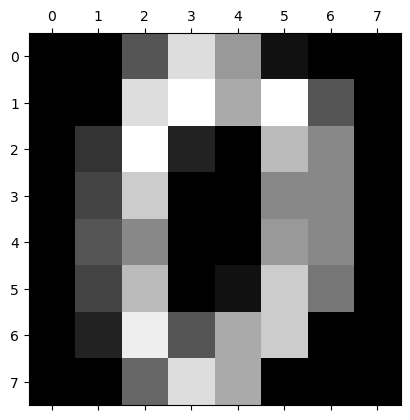

In [98]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [126]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## 2. Linear and quadratic discriminant analysis

The model now considered is not the naives Bayes, since it does not any more the assumption of conditional independence. It is however still a generative classifier since it models the distribution of $(x,y)$ then it deduce the distribution of $y|x$ using the Bayes theorem. 

More information can be found on : 

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

The **linear discriminant analysis** assumes multivariate Gaussian distribution in each class, and moreover the covariance matrices are assumed to be the same in each class: 
$$
x | y = k \sim \mathcal{N}(\mu_k , \Sigma)
$$
This results in a linear decision boundary. 


The **quadratic discriminant analysis** assumes multivariate Gaussian distribution in each class, and moreover the covariance matrices are assumed to be the same in each class: 
$$
x | y = k \sim \mathcal{N}(\mu_k , \Sigma_k).
$$
This results in a quadratic decision boundary.

**Remarks** : 

- Linear discriminant analysis can also be used for dimension reduction by looking for the most discriminant components (K-1 discriminant components if $K$ classes are considered) 
- In high dimensional setting the `shrinkage` parameter can be used in order to regularize the estimator of the covariance matrix, for example of the kind $(1-\alpha)\hat\Sigma + \alpha I$



**Q8** : Fit a linear discriminant analysis on the MNIST dataset, try to optimize the value of the shrinkage parameter